## Local Train
Local train is faster and more interactive, but it cannot take too much training data

Copy a subset of data.

In [3]:
# Some code to determine a unique bucket name for the purposes of the sample
from gcp.context import Context

CLOUD_PROJECT = Context.default().project_id
ml_bucket_name = CLOUD_PROJECT + '-mldata'
ml_bucket_path = 'gs://' + ml_bucket_name
OUTPUT_DIR = ml_bucket_path + '/sampledata/ml/image/output'

In [4]:
%%bash -s "$OUTPUT_DIR"
mkdir -p /datalab/ml/image
gsutil -m cp $1/dict.txt $1/data/data.*-00000-of-00010 /datalab/ml/image

Copying gs://cloud-ml-users-mldata/sampledata/ml/image/output/dict.txt...
Copying gs://cloud-ml-users-mldata/sampledata/ml/image/output/data/data.train.json-00000-of-00010...
Copying gs://cloud-ml-users-mldata/sampledata/ml/image/output/data/data.test.json-00000-of-00010...


In [5]:
with open('/datalab/ml/image/dict.txt') as f:
  dictionary = f.read().splitlines()
print dictionary

['tulips', 'roses', 'dandelion', 'sunflowers', 'daisy']


### Define the TensorFlow model
TensorFlow model can be either declared in-line or loaded from a file.
There is already a file that defines image classification model. It is loaded here.

In [6]:
%%tensorflow graph

from image_classification import *

### Define a dataset

In [7]:
LOCAL_TRAIN_DATA = '/datalab/ml/image/data.train.json-00000-of-00010'
LOCAL_TEST_DATA = '/datalab/ml/image/data.test.json-00000-of-00010'

In [8]:
%%ml dataset -n image_data_local
train: $LOCAL_TRAIN_DATA
test:  $LOCAL_TEST_DATA

### Run training
As part of training call a set of hyperparameters can be passed. Those hyperparameters can be access in code (image_classification.py imported above) that generates the TensorFlow graph.

In [9]:
%%ml train -m image.v1 -d image_data_local
dropout_keep_prob: 0.5
hidden_layer_size: 512
batch_size: 64
learning_rate: 0.01
steps: 637
embedding_size: 2048
labels: 5

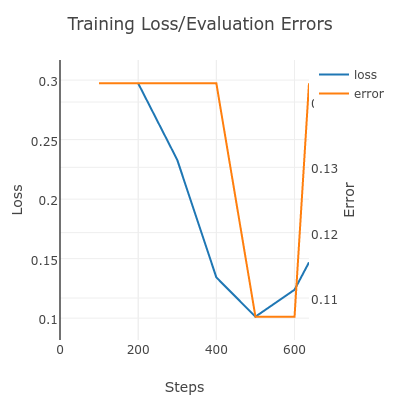

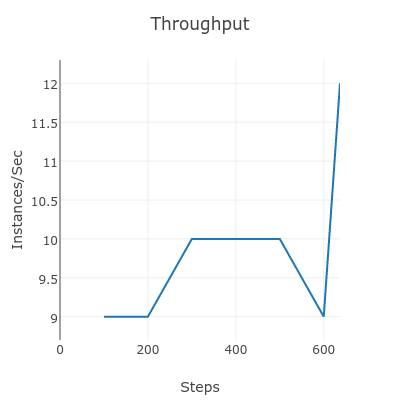

In [10]:
%%ml analyze --model image.v1

## Cloud Train

Define full training dateset.

In [11]:
CLOUD_TRAIN_DATA = '%s/data/data.train.json-*' % OUTPUT_DIR
CLOUD_TEST_DATA = '%s/data/data.test.json-00000-of-00010' % OUTPUT_DIR

In [12]:
%%ml dataset -n cloud_image_data
train: $CLOUD_TRAIN_DATA
test: $CLOUD_TEST_DATA

### Run training

In [14]:
%%ml train -m image.v1 -d cloud_image_data -o "$OUTPUT_DIR/model/" --cloud --overwrite
replicas: 5
dropout_keep_prob: 0.5
hidden_layer_size: 512
batch_size: 64
learning_rate: 0.01
steps: 6370
embedding_size: 2048
labels: 5

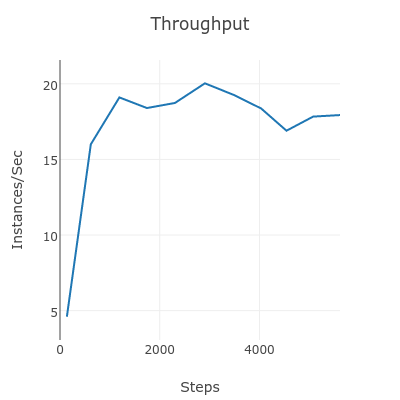

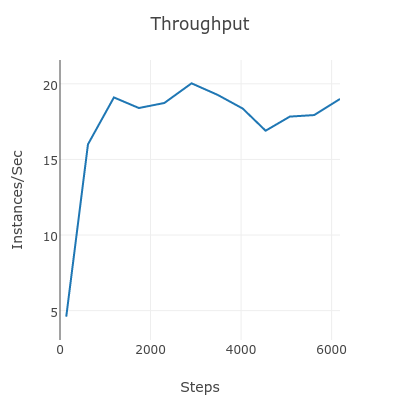

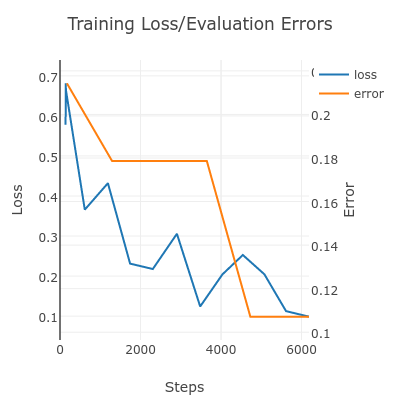

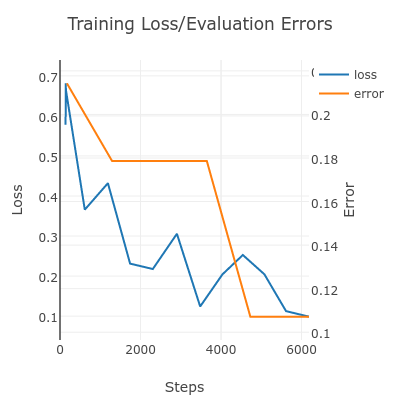

In [15]:
%%ml analyze --model image.v1 --cloud